In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [52]:
df=pd.read_csv("Churn_Modelling.csv")
df.shape

(10000, 14)

In [53]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [54]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [55]:
#Seperating features and labels
x=df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y=df['Exited']

In [92]:
# x1=df.iloc[:, :df.shape[1]-1] #selects all rows of all columns, except last
# y1=df.iloc[:, -1] #selects the last column
# x1.shape, y1.shape

((10000, 13), (10000,))

In [97]:
# # Encoding categorical data (country - geography)
# print(x1.iloc[:, 4], ".... will become: ")
# lc=LabelEncoder()
# x1.iloc[:, 4]=lc.fit_transform(x1.iloc[:, 4])
# print(x1.iloc[:8, 4])

# # same with gender
# x1.iloc[:, 5]=lc.fit_transform(x1.iloc[:, 5])

0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length: 10000, dtype: object .... will become: 
0    0
1    2
2    0
3    0
4    2
5    2
6    0
7    1
Name: Geography, dtype: int32


C:\Users\Atharva\AppData\Local\Temp\ipykernel_4056\38391034.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x1.iloc[:, 4]=lc.fit_transform(x1.iloc[:, 4])


In [56]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


<AxesSubplot: xlabel='Exited', ylabel='count'>

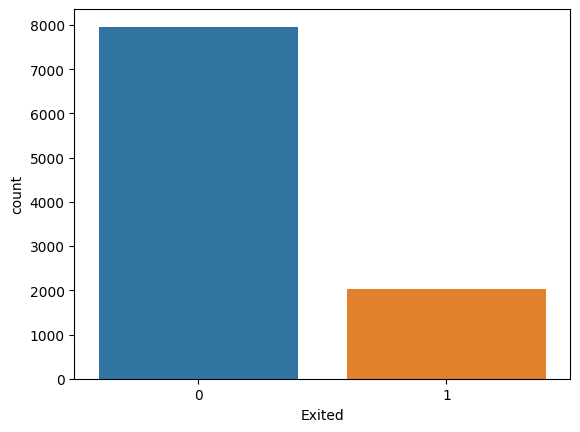

In [57]:
sns.countplot(x=y)

<AxesSubplot: xlabel='Exited'>

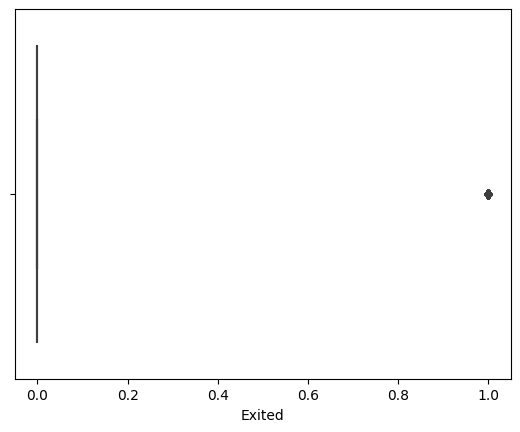

In [58]:
sns.boxplot(data=df, x=y)

In [59]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [60]:
scaler=StandardScaler()

In [61]:
x_scaled=scaler.fit_transform(x)

In [62]:
x_scaled

array([[-0.32622142,  0.29351742, -1.04175968, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  0.19816383, -1.38753759, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418,  0.29351742,  1.03290776, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=0, test_size=0.25)

In [64]:
x_test.shape

(2500, 8)

In [65]:
x_train.shape

(7500, 8)

In [66]:
from sklearn.neural_network import MLPClassifier

In [67]:
ann=MLPClassifier(hidden_layer_sizes=(100, 100, 100), random_state=0, max_iter=100, activation='relu')

In [68]:
ann.fit(x_train, y_train)

C:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [69]:
y_pred=ann.predict(x_test)

In [70]:
y_test.value_counts()

0    1991
1     509
Name: Exited, dtype: int64

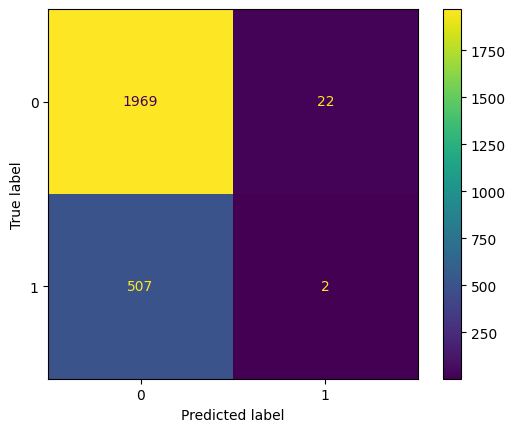

In [71]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [72]:
accuracy_score(y_test, y_pred)

0.7884

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88      1991
           1       0.08      0.00      0.01       509

    accuracy                           0.79      2500
   macro avg       0.44      0.50      0.44      2500
weighted avg       0.65      0.79      0.70      2500

